# __Simulating Supply Tutorial__

<br>

Finance 5330: Advanced Derivative Markets <br>
Tyler J. Brough <br>
Last Updated: March 19, 2019 <br>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Simulating the Spot Prices for Heating Oil and Gasoline

To simulate a few values from the spot price equation, which is stated as follows:

<br>
<br>

$$
\ln{ \left( \frac{S_{i,t}}{S_{i,t-1}} \right)} = \alpha_{i} (\beta_{i} - S_{i,t-1}) + \varepsilon_{i,t}
$$

<br>
<br>

Where $\varepsilon_{1}, \varepsilon_{2} \sim BVN(0,\sigma_{1}^{2}, 0, \sigma_{2}^{2}, \rho)$. For convenience we can rewrite this as:

<br>
<br>

$$
\ln{(S_{i,t})} = \ln{(S_{i,t-1})} + \alpha_{i} (\beta_{i} - S_{i,t-1}) + \varepsilon_{i,t}
$$

<br>
<br>

In [4]:
a1 = 0.342
b1 = 0.539
s1 = 0.11
S1 = 0.69
numReps = 45

lnSpot1 = np.zeros(numReps)
lnSpot1[0] = np.log(S1)

z1 = np.random.normal(size=numReps)

for t in range(1, numReps):
    lnSpot1[t] = lnSpot1[t-1] + a1 * (b1 - np.exp(lnSpot1[t-1])) + z1[t] * s1

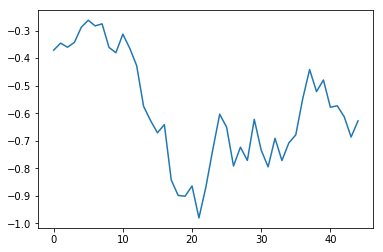

In [5]:
plt.plot(lnSpot1)

## Simulating Correlated Normals

Since the disturbance terms are distributed jointly Normal, we need a way to draw from the BVN distribution. It turns out this is pretty easy. 

<br>

Here are the necessary steps to draw two correlated normal random variables. 

1. Draw $z_{1}$ independently from $N(0,\sigma_{z_{1}})$
2. Next draw $z_{tmp}$ from a standard normal $N(0,1)$
3. Create $z_{2}$ that is correlated with $z_{1}$ according to the correlation coeficient $\rho$

<br>

We can use the following equation to accomplish the third step:

$$
z_{2} = z_{1} * \rho + \sqrt{(1 - \rho^{2})} * z_{tmp} * \sigma_{2}
$$

<br>

We can do this in Python as follows:

In [10]:
s1 = 0.11
s2 = 0.116
rho = 0.705
numReps = 10000

z1 = np.random.normal(size=numReps) * s1
ztmp = np.random.normal(size=numReps)
z2 = z1 * rho + np.sqrt((1 - rho**2)) * ztmp * s2

In [11]:
np.corrcoef(z1,z2)

array([[1.        , 0.68376893],
       [0.68376893, 1.        ]])

<br>

I prefer to create a function to handle it: 

<br>

In [12]:
def drawCorrelatedNormals(mn1 = 0.0, sd1 = 1.0, mn2 = 0.0, sd2 = 1.0, rho = 0.5, numReps = 100):
    z1 = np.random.normal(size=numReps, loc=mn1, scale=sd1)
    z2 = np.random.normal(size=numReps, loc=mn2, scale=sd2)
    z2 = rho * z1 + np.sqrt((1.0 - rho**2.0)) * z2
    
    return (z1,z2)

In [13]:
x1, x2 = drawCorrelatedNormals(sd1=0.11, sd2=0.116, rho=0.705, numReps=45)
np.corrcoef(x1, x2)

array([[1.        , 0.63481878],
       [0.63481878, 1.        ]])

<br>

## Simulating Sport Prices for Oil and Gasoline Jointly

With this in place, we can now simulate spot prices jointly as follows:

<br>

In [14]:
a1 = 0.342
b1 = 0.539
s1 = 0.11
S1 = 0.69
a1 = 0.342
b1 = 0.539
s1 = 0.11
S1 = 0.69
a2 = 0.391
b2 = 0.560
s2 = 0.116
S2 = 0.80
numReps = 45

lnSpot1 = np.zeros(numReps)
lnSpot2 = np.zeros(numReps)

lnSpot1[0] = np.log(S1)
lnSpot2[0] = np.log(S2)


z1, z2 = drawCorrelatedNormals(sd1=s1, sd2=s2, rho=rho, numReps=numReps)

for t in range(1, numReps):
    lnSpot1[t] = lnSpot1[t-1] + a1 * (b1 - np.exp(lnSpot1[t-1])) + z1[t]
    lnSpot2[t] = lnSpot2[t-1] + a2 * (b2 - np.exp(lnSpot2[t-1])) + z2[t] 

ts = pd.DataFrame({'Z1' : lnSpot1, 'Z2' : lnSpot2})

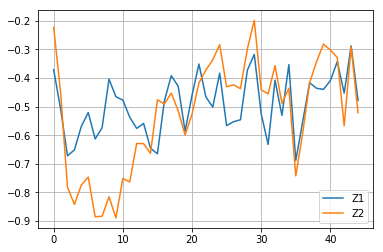

In [15]:
ts.plot(grid=True)

In [49]:
ts.head()

,Z1,Z2
0,-0.371064,-0.223144
1,-0.391465,-0.245855
2,-0.207017,-0.190089
3,-0.184068,-0.339171
4,-0.301766,-0.331299


In [50]:
ts.tail()

,Z1,Z2
40,-0.548103,-0.460639
41,-0.710941,-0.644121
42,-0.747535,-0.698347
43,-0.688057,-0.753505
44,-0.607892,-0.483634
